<a href="https://colab.research.google.com/github/fikahusnaamalinamubarok/Telcho-Churn-/blob/main/Telco-Customer-Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fika Husna Amalina Mubarok


### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata

1. Customers who left within the last month – the column is called Churn 
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents



### Business Understanding
Perusahaan mengalami kerugian dikarenakan banyaknya customer yang berhenti berlangganan atau biasa disebut ( Churn ). 
Dari sini kita perlu memahami mengapa churn terjadi dengan jumlah yang besar sehingga Business dapat memberi treatment kepada customer agar tetap loyal. Setelah Step ini kita akan membuat Modeling .



### Mounting with your Google Drive

In [ ]:
#mounting with ur g drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library and Load Data set

In [ ]:
#import Linrary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [ ]:
# Import data from google drive 
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Cleansing

In [ ]:
#Priview Data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4516,4077-HWUYD,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),87.55,6463.15,No
3100,7271-AJDTL,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),94.45,5073.1,No
6464,4726-DLWQN,Male,1,No,No,50,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),70.35,3454.6,No
2940,6313-GIDIT,Male,1,No,No,53,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,Yes
3581,7860-UXCRM,Male,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),74.50,4674.55,No


Observation:

* tenure, MonthlyCharges, and TotalCharges columns are numeric.
* SeniorCitizen is apparently a binary (0,1)
* Other columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
* all Column names will be changed to small (optional)

In [ ]:
# exclude rows that contain whitespace from totalcharges columns (Filtering)
df = df.loc[~df['TotalCharges'].str.contains(' ')]

### Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


* Data contains 21 columns with 7042 rows.
* The entries changed to 7032 after filtering step
* TotalCharges dtypes is inappropriate. It will be changed to float64

In [ ]:
#Change totalcharges to numeric ( float64)
df['TotalCharges'] = df['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# percentage Missing Values
df.isna().sum() * 100 / len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Observation

* No missing values

### Duplicated Data

In [ ]:
# check duplicated data
df.duplicated().sum()

0

Observation:
* No duplicated data

#### Separate columns into numerical and categorical

In [ ]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = list(set(all_columns) - set(numerical))

In [ ]:
# check for odd values in categorical columns, such as string "-", or other
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64 

gender
Male      3549
Female    3483
Name: gender, dtype: int64 

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64 

SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype:

## Observation
* No odd value
* For some columns, there are 'No internet service' and 'No phone service'. For analysis further and make modelling, they can be changed to 'No' because both of them are same with 'No'

#### EDA ( Exploratory Data Analysis )  

##Statistical Summary of Columns

In [ ]:
df[numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Observation
* Overall, the minimum and maximum values make sense for each column.
* Mean is not close to 50% (Median) in `tenure`, `monthlyCharges`, and `totalcharges` column, indicating somewhat not symmetrical distribution

### Univariate Analysis

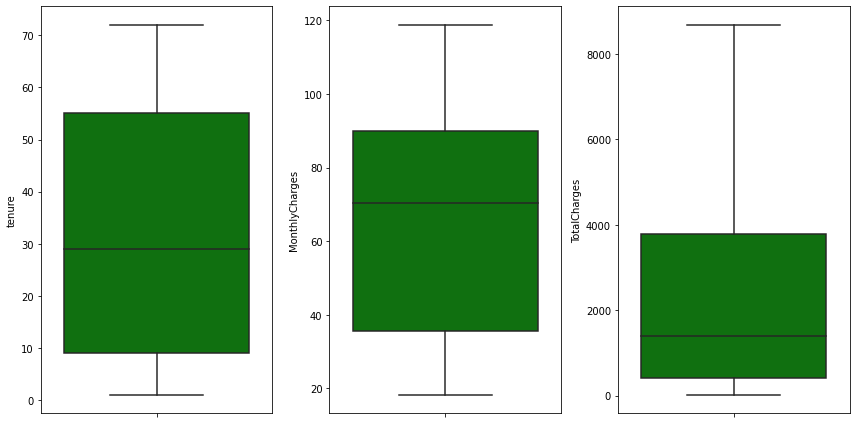

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

## Observation

* There is no outlier in `tenure`, `monthlycharges`, and `totalcharges` column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

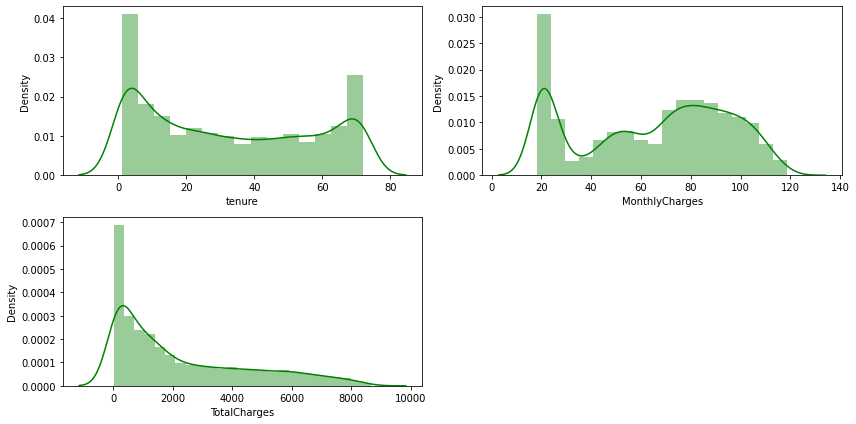

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

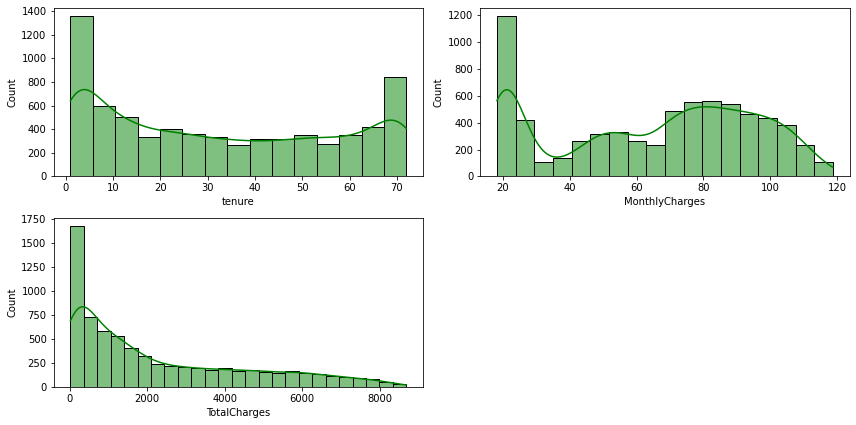

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='green', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# check distribution peak for every column in numerical
for i in df[numerical].columns:
    x = df[numerical][i].mode()
    print(i)
    print(x,'\n')

tenure
0    1
dtype: int64 

MonthlyCharges
0    20.05
dtype: float64 

TotalCharges
0    20.2
dtype: float64 



##Observation
* Most customer has distribution peak `Tenure = 1 month`, `MonthlyCharges ~ 20`, `TotalCharges ~ 20`.
* `Tenure` column has U-shape distribution, `MonthlyCharges` column has bimodal distribution, `TotalCharges` column has J-shape distribution.
* The highest number of customers have a short term tenure. And also a high number of customers has a long term tenure.

### Bivariate Analysis

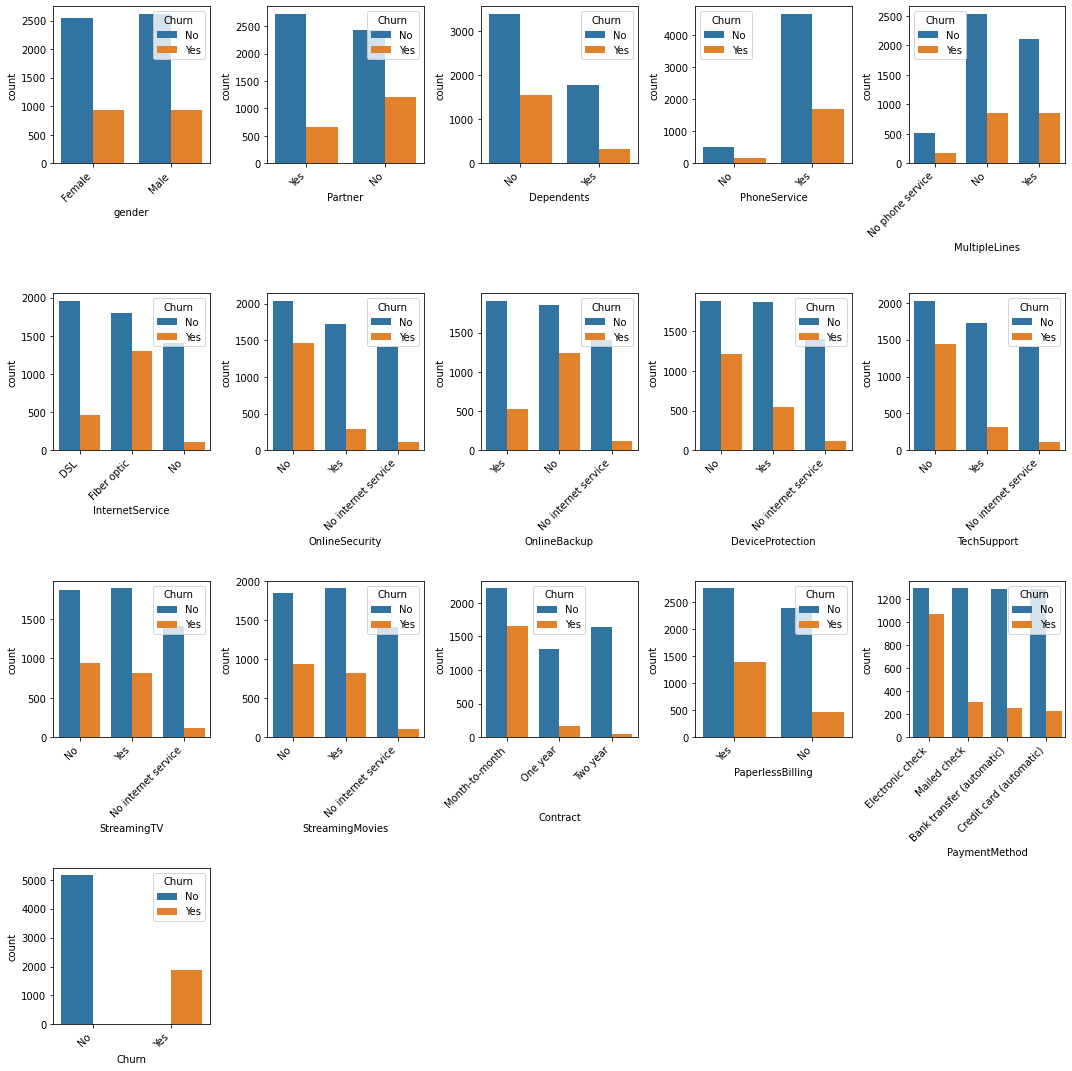

In [ ]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df[col], hue='Churn', data=df, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

Observasi :
* `gender` doesnt seem affect churn rate.
* `seniorcitizen`, dominated by the senior that LEAVE the service.
* `partner`, customer without partner tend to LEAVE the service.
* `dependents`, customer without `dependents` tend to LEAVE the service.
* `phoneservice` doesnt seem affect the `churn` rate.
* `multiplelines`, customer with `No phone service` tend to RETAIN the service.
* `internetservice`, customer that choose `Fiber optic` tend to LEAVE the service.
* `churn` rate HIGHER in customer that has NO `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, and `streamingmovies` service.
* `contract`, customer with `Month-to-Month` tend to LEAVE the service.
* `paperlessbilling` has HIGHER `churn` rate.
* `paymentmethod` with `Electronic check` have the HIGHEST `churn` rate compared to another method.

## Multivariate Analysis

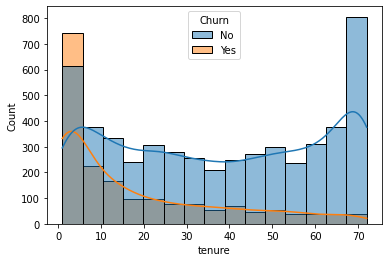

In [ ]:
sns.histplot(data=df,
            x='tenure',
            hue='Churn', alpha=0.5, kde=True)

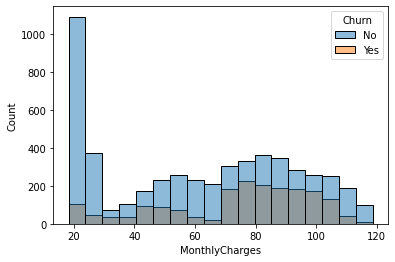

In [ ]:
sns.histplot(data=df,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

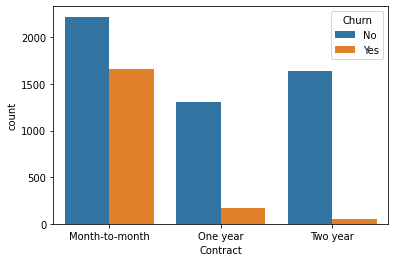

In [ ]:
sns.countplot(data = df, 
              x = 'Contract', 
              hue = 'Churn')
plt.show()

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer.
* Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
* Most churn customers purchased a short term month-to-month contract.

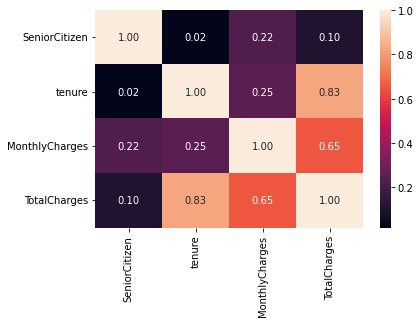

In [ ]:
# correlation heatmap df
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Observation
* `Tenure` and `TotalCharges` are highly correlated each other
* Low correlation for other columns

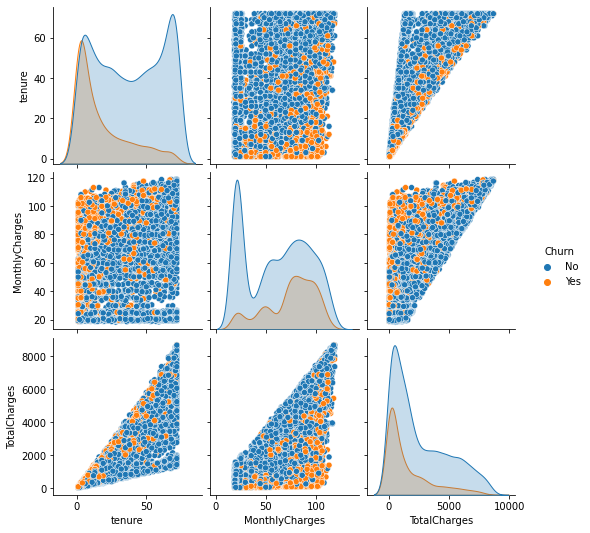

In [ ]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer
* Higher monthly charges tend to have higher churn percentage

## Conclusion
1. The data does not contain major issues. No NULL values, no duplicated rows and no odd values. We drop null values due to small in proportion (< 5%) and `Churn` = No.
2. Overall, the minimum and maximum values make sense for each column.
3. Most columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
4. `TotalCharges` dtypes is inappropriate. It has been changed to float64.
5. All of the columns with continuous numerical values are not symmetric.
6. Most of the customers has a phone service (90%).
7. 73% of the customers is not churn.
8. From histogram plot of `Tenure` and `Churn` column, we can say that the churn rate decreases as the tenure increase. Good maintain for long time customer.
9. Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
10. Most churn customers purchased a short term month-to-month contract.
11. Tenure and contract duration seems to be strong factors for churn
12. From correlation heatmap: We can see that `Tenure` and `TotalCharges` are highly correlated each other.
13. From pairplot: We can see that higher monthly charges tend to have higher churn percentage

#Data Preprocessing

#Look data ( Data Information)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.drop(["customerID"],axis=1,inplace = True)

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df.gender = [1 if each == "Male" else 0 for each in df.gender]

columns_to_convert = [ 'Partner','Dependents',                  
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


# Copy Data

In [ ]:
data_telco = df.copy()

### Frequency Encoding : Feature Engineering


In [ ]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,-1,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
df = df.copy()

##Dependents

In [ ]:
freq_et = df['Dependents'].value_counts().reset_index()
freq_et

,index,Dependents
0,0,4933
1,1,2099


In [ ]:
freq_et.rename(columns={"index": "Dependents", "Dependents": "freq_Dependents"}, inplace = True)

In [ ]:
freq_et

,Dependents,freq_Dependents
0,0,4933
1,1,2099


In [ ]:
freq_et['percentage_Dependents'] = round((freq_et['freq_Dependents']/freq_et['freq_Dependents'].sum())*100,2)
freq_et

,Dependents,freq_Dependents,percentage_Dependents
0,0,4933,70.15
1,1,2099,29.85


In [ ]:
df = df.merge(freq_et[['Dependents','percentage_Dependents']], on='Dependents', how='inner')

In [ ]:
df[['Dependents','percentage_Dependents']]

,Dependents,percentage_Dependents
0,0,70.15
1,0,70.15
2,0,70.15
3,0,70.15
4,0,70.15
...,...,...
7027,1,29.85
7028,1,29.85
7029,1,29.85
7030,1,29.85


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,70.15
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,70.15
3,1,0,0,0,45,0,-1,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,70.15
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,70.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,70.65,70.65,1,29.85
7028,1,0,1,1,12,1,0,No,-1,-1,...,-1,-1,-1,Month-to-month,1,Electronic check,19.20,239.00,0,29.85
7029,1,0,1,1,24,1,1,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,29.85
7030,0,0,1,1,72,1,1,Fiber optic,0,1,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,29.85


## Partner 

In [ ]:
freq_et = df['Partner'].value_counts().reset_index()
freq_et.rename(columns={"index": "Partner", "Partner": "freq_Partner"}, inplace = True)
freq_et['percentage_Partner'] = round((freq_et['freq_Partner']/freq_et['freq_Partner'].sum())*100,2)
freq_et

,Partner,freq_Partner,percentage_Partner
0,0,3639,51.75
1,1,3393,48.25


In [ ]:
df = df.merge(freq_et[['Partner','percentage_Partner']], on='Partner', how='inner')
df[['Partner','percentage_Partner']]

,Partner,percentage_Partner
0,1,48.25
1,1,48.25
2,1,48.25
3,1,48.25
4,1,48.25
...,...,...
7027,0,51.75
7028,0,51.75
7029,0,51.75
7030,0,51.75


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25
1,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,70.15,48.25
2,1,0,1,0,58,1,1,Fiber optic,0,0,...,1,1,One year,0,Credit card (automatic),100.35,5681.10,0,70.15,48.25
3,1,0,1,0,12,1,0,No,-1,-1,...,-1,-1,One year,0,Bank transfer (automatic),19.80,202.25,0,70.15,48.25
4,0,0,1,0,58,1,1,DSL,0,1,...,0,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,48,0,-1,DSL,0,1,...,0,1,Month-to-month,0,Credit card (automatic),45.55,2108.35,0,29.85,51.75
7028,1,0,0,1,50,0,-1,DSL,1,1,...,1,0,One year,1,Bank transfer (automatic),43.05,2208.05,0,29.85,51.75
7029,1,0,0,1,1,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Mailed check,24.20,24.20,0,29.85,51.75
7030,1,0,0,1,31,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Credit card (automatic),25.00,789.20,0,29.85,51.75


## InternetServices


In [ ]:
freq_et = df['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_Internet_service"}, inplace = True)
freq_et['percentage_internet_service'] = round((freq_et['freq_Internet_service']/freq_et['freq_Internet_service'].sum())*100,2)
freq_et

,InternetService,freq_Internet_service,percentage_internet_service
0,Fiber optic,3096,44.03
1,DSL,2416,34.36
2,No,1520,21.62


In [ ]:
df = df.merge(freq_et[['InternetService','percentage_internet_service']], on='InternetService', how='inner')
df[['InternetService','percentage_internet_service']]

,InternetService,percentage_internet_service
0,DSL,34.36
1,DSL,34.36
2,DSL,34.36
3,DSL,34.36
4,DSL,34.36
...,...,...
7027,No,21.62
7028,No,21.62
7029,No,21.62
7030,No,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36
1,0,0,1,0,58,1,1,DSL,0,1,...,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25,34.36
2,1,0,1,0,72,1,1,DSL,1,1,...,1,Two year,1,Credit card (automatic),90.25,6369.45,0,70.15,48.25,34.36
3,0,0,1,0,13,1,1,DSL,1,1,...,0,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36
4,0,1,1,0,25,1,1,DSL,1,0,...,0,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,25,1,0,No,-1,-1,...,-1,Month-to-month,0,Mailed check,20.80,460.20,0,29.85,51.75,21.62
7028,1,0,0,1,1,1,0,No,-1,-1,...,-1,Month-to-month,1,Mailed check,19.30,19.30,0,29.85,51.75,21.62
7029,1,0,0,1,44,1,0,No,-1,-1,...,-1,Two year,0,Bank transfer (automatic),19.55,819.95,0,29.85,51.75,21.62
7030,1,0,0,1,27,1,0,No,-1,-1,...,-1,Two year,0,Credit card (automatic),19.70,509.30,0,29.85,51.75,21.62


#Contract

In [ ]:
freq_et = df['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['percentage_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
freq_et

,Contract,freq_Contract,percentage_Contract
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


In [ ]:
df = df.merge(freq_et[['Contract','percentage_Contract']], on='Contract', how='inner')
df[['Contract','percentage_Contract']]

,Contract,percentage_Contract
0,Month-to-month,55.11
1,Month-to-month,55.11
2,Month-to-month,55.11
3,Month-to-month,55.11
4,Month-to-month,55.11
...,...,...
7027,One year,20.93
7028,One year,20.93
7029,One year,20.93
7030,One year,20.93


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract
0,0,0,1,0,1,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11
1,0,0,1,0,13,1,1,DSL,1,1,...,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11
2,0,1,1,0,25,1,1,DSL,1,0,...,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36,55.11
3,1,0,1,0,29,0,-1,DSL,0,0,...,Month-to-month,0,Mailed check,33.75,1009.25,0,70.15,48.25,34.36,55.11
4,1,1,1,0,58,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,39,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93
7028,1,0,0,1,30,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93
7029,1,0,0,1,52,1,0,No,-1,-1,...,One year,0,Credit card (automatic),19.65,928.40,0,29.85,51.75,21.62,20.93
7030,0,0,0,1,2,1,0,No,-1,-1,...,One year,0,Bank transfer (automatic),20.50,38.25,0,29.85,51.75,21.62,20.93


#Payment Method

In [ ]:
freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['percentage_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,percentage_PaymentMethod
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [ ]:
df = df.merge(freq_et[['PaymentMethod','percentage_PaymentMethod']], on='PaymentMethod', how='inner')
df[['PaymentMethod','percentage_PaymentMethod']]

,PaymentMethod,percentage_PaymentMethod
0,Electronic check,33.63
1,Electronic check,33.63
2,Electronic check,33.63
3,Electronic check,33.63
4,Electronic check,33.63
...,...,...
7027,Bank transfer (automatic),21.93
7028,Bank transfer (automatic),21.93
7029,Bank transfer (automatic),21.93
7030,Bank transfer (automatic),21.93


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod
0,0,0,1,0,1,0,-1,DSL,0,1,...,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63
1,0,0,1,0,13,1,1,DSL,1,1,...,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11,33.63
2,1,1,1,0,58,0,-1,DSL,0,1,...,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63
3,0,0,1,0,1,0,-1,DSL,0,0,...,1,Electronic check,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63
4,1,1,1,0,1,0,-1,DSL,0,1,...,0,Electronic check,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,37,1,0,No,-1,-1,...,0,Bank transfer (automatic),20.30,755.40,0,29.85,51.75,21.62,20.93,21.93
7028,1,0,0,1,10,1,0,No,-1,-1,...,1,Bank transfer (automatic),19.95,219.50,0,29.85,51.75,21.62,20.93,21.93
7029,1,0,0,1,39,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93,21.93
7030,1,0,0,1,30,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93,21.93


#PhoneService

In [ ]:
freq_et = df['PhoneService'].value_counts().reset_index()
freq_et.rename(columns={"index": "PhoneService", "PhoneService": "freq_PhoneService"}, inplace = True)
freq_et['percentage_PhoneService'] = round((freq_et['freq_PhoneService']/freq_et['freq_PhoneService'].sum())*100,2)
freq_et

,PhoneService,freq_PhoneService,percentage_PhoneService
0,1,6352,90.33
1,0,680,9.67


In [ ]:
df = df.merge(freq_et[['PhoneService','percentage_PhoneService']], on='PhoneService', how='inner')
df[['PhoneService','percentage_PhoneService']]

,PhoneService,percentage_PhoneService
0,0,9.67
1,0,9.67
2,0,9.67
3,0,9.67
4,0,9.67
...,...,...
7027,1,90.33
7028,1,90.33
7029,1,90.33
7030,1,90.33


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService
0,0,0,1,0,1,0,-1,DSL,0,1,...,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67
1,1,1,1,0,58,0,-1,DSL,0,1,...,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67
2,0,0,1,0,1,0,-1,DSL,0,0,...,Electronic check,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67
3,1,1,1,0,1,0,-1,DSL,0,1,...,Electronic check,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67
4,0,1,1,0,29,0,-1,DSL,1,0,...,Electronic check,45.00,1228.65,0,70.15,48.25,34.36,55.11,33.63,9.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,37,1,0,No,-1,-1,...,Bank transfer (automatic),20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33
7028,1,0,0,1,10,1,0,No,-1,-1,...,Bank transfer (automatic),19.95,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33
7029,1,0,0,1,39,1,1,No,-1,-1,...,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93,21.93,90.33
7030,1,0,0,1,30,1,1,No,-1,-1,...,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93,21.93,90.33


#MultipleLines

In [ ]:
freq_et = df['MultipleLines'].value_counts().reset_index()
freq_et.rename(columns={"index": "MultipleLines", "MultipleLines": "freq_MultipleLines"}, inplace = True)
freq_et['percentage_MultipleLines'] = round((freq_et['freq_MultipleLines']/freq_et['freq_MultipleLines'].sum())*100,2)
freq_et

,MultipleLines,freq_MultipleLines,percentage_MultipleLines
0,0,3385,48.14
1,1,2967,42.19
2,-1,680,9.67


In [ ]:
df = df.merge(freq_et[['MultipleLines','percentage_MultipleLines']], on='MultipleLines', how='inner')
df[['MultipleLines','percentage_MultipleLines']]

,MultipleLines,percentage_MultipleLines
0,-1,9.67
1,-1,9.67
2,-1,9.67
3,-1,9.67
4,-1,9.67
...,...,...
7027,0,48.14
7028,0,48.14
7029,0,48.14
7030,0,48.14


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines
0,0,0,1,0,1,0,-1,DSL,0,1,...,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67
1,1,1,1,0,58,0,-1,DSL,0,1,...,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
2,0,0,1,0,1,0,-1,DSL,0,0,...,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
3,1,1,1,0,1,0,-1,DSL,0,1,...,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
4,0,1,1,0,29,0,-1,DSL,1,0,...,45.00,1228.65,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,19.10,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7028,1,0,0,1,40,1,0,No,-1,-1,...,20.40,854.90,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7029,0,0,0,1,37,1,0,No,-1,-1,...,20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7030,1,0,0,1,10,1,0,No,-1,-1,...,19.95,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14


#OnlineSecurity

In [ ]:
freq_et = df['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et['percentage_OnlineSecurity'] = round((freq_et['freq_OnlineSecurity']/freq_et['freq_OnlineSecurity'].sum())*100,2)
freq_et

,OnlineSecurity,freq_OnlineSecurity,percentage_OnlineSecurity
0,0,3497,49.73
1,1,2015,28.65
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['OnlineSecurity','percentage_OnlineSecurity']], on='OnlineSecurity', how='inner')
df[['OnlineSecurity','percentage_OnlineSecurity']]

,OnlineSecurity,percentage_OnlineSecurity
0,0,49.73
1,0,49.73
2,0,49.73
3,0,49.73
4,0,49.73
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity
0,0,0,1,0,1,0,-1,DSL,0,1,...,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
1,1,1,1,0,58,0,-1,DSL,0,1,...,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
2,0,0,1,0,1,0,-1,DSL,0,0,...,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
3,1,1,1,0,1,0,-1,DSL,0,1,...,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
4,1,1,1,0,44,0,-1,DSL,0,1,...,1359.70,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,854.90,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62


#OnlineBackup

In [ ]:
freq_et = df['OnlineBackup'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineBackup", "OnlineBackup": "freq_OnlineBackup"}, inplace = True)
freq_et['percentage_OnlineBackup'] = round((freq_et['freq_OnlineBackup']/freq_et['freq_OnlineBackup'].sum())*100,2)
freq_et

,OnlineBackup,freq_OnlineBackup,percentage_OnlineBackup
0,0,3087,43.90
1,1,2425,34.49
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['OnlineBackup','percentage_OnlineBackup']], on='OnlineBackup', how='inner')
df[['OnlineBackup','percentage_OnlineBackup']]

,OnlineBackup,percentage_OnlineBackup
0,1,34.49
1,1,34.49
2,1,34.49
3,1,34.49
4,1,34.49
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
1,1,1,1,0,58,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
2,1,1,1,0,1,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
3,1,1,1,0,44,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
4,0,0,1,0,51,0,-1,DSL,0,1,...,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62


#DeviceProtection

In [ ]:
freq_et = df['DeviceProtection'].value_counts().reset_index()
freq_et.rename(columns={"index": "DeviceProtection", "DeviceProtection": "freq_DeviceProtection"}, inplace = True)
freq_et['percentage_DeviceProtection'] = round((freq_et['freq_DeviceProtection']/freq_et['freq_DeviceProtection'].sum())*100,2)
freq_et

,DeviceProtection,freq_DeviceProtection,percentage_DeviceProtection
0,0,3094,44.00
1,1,2418,34.39
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['DeviceProtection','percentage_DeviceProtection']], on='DeviceProtection', how='inner')
df[['DeviceProtection','percentage_DeviceProtection']]

,DeviceProtection,percentage_DeviceProtection
0,0,44.00
1,0,44.00
2,0,44.00
3,0,44.00
4,0,44.00
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection
0,0,0,1,0,1,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
1,1,1,1,0,1,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
2,1,1,1,0,44,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
3,0,0,1,0,51,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
4,1,0,1,0,54,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62


#TechSupport

In [ ]:
freq_et = df['TechSupport'].value_counts().reset_index()
freq_et.rename(columns={"index": "TechSupport", "TechSupport": "freq_TechSupport"}, inplace = True)
freq_et['percentage_TechSupport'] = round((freq_et['freq_TechSupport']/freq_et['freq_TechSupport'].sum())*100,2)
freq_et

,TechSupport,freq_TechSupport,percentage_TechSupport
0,0,3472,49.37
1,1,2040,29.01
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['TechSupport','percentage_TechSupport']], on='TechSupport', how='inner')
df[['TechSupport','percentage_TechSupport']]

,TechSupport,percentage_TechSupport
0,0,49.37
1,0,49.37
2,0,49.37
3,0,49.37
4,0,49.37
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport
0,0,0,1,0,1,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
1,1,1,1,0,1,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
2,1,1,1,0,44,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
3,0,0,1,0,51,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
4,1,0,1,0,54,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62


#StreamingTV

In [ ]:
freq_et = df['StreamingTV'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingTV", "StreamingTV": "freq_StreamingTV"}, inplace = True)
freq_et['percentage_StreamingTV'] = round((freq_et['freq_StreamingTV']/freq_et['freq_StreamingTV'].sum())*100,2)
freq_et

,StreamingTV,freq_StreamingTV,percentage_StreamingTV
0,0,2809,39.95
1,1,2703,38.44
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['StreamingTV','percentage_StreamingTV']], on='StreamingTV', how='inner')
df[['StreamingTV','percentage_StreamingTV']]

,StreamingTV,percentage_StreamingTV
0,0,39.95
1,0,39.95
2,0,39.95
3,0,39.95
4,0,39.95
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV
0,0,0,1,0,1,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
1,1,1,1,0,44,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
2,1,0,1,0,54,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
3,0,1,1,0,3,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
4,1,0,1,1,1,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62


#StreamingMovies

In [ ]:
freq_et = df['StreamingMovies'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingMovies", "StreamingMovies": "freq_StreamingMovies"}, inplace = True)
freq_et['percentage_StreamingMovies'] = round((freq_et['freq_StreamingMovies']/freq_et['freq_StreamingMovies'].sum())*100,2)
freq_et

,StreamingMovies,freq_StreamingMovies,percentage_StreamingMovies
0,0,2781,39.55
1,1,2731,38.84
2,-1,1520,21.62


In [ ]:
df = df.merge(freq_et[['StreamingMovies','percentage_StreamingMovies']], on='StreamingMovies', how='inner')
df[['StreamingMovies','percentage_StreamingMovies']]

,StreamingMovies,percentage_StreamingMovies
0,0,39.55
1,0,39.55
2,0,39.55
3,0,39.55
4,0,39.55
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies
0,0,0,1,0,1,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
1,1,1,1,0,44,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
2,1,0,1,0,54,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
3,0,1,1,0,3,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
4,1,0,1,1,1,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62


#PaperlessBilling

In [ ]:
freq_et = df['PaperlessBilling'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaperlessBilling", "PaperlessBilling": "freq_PaperlessBilling"}, inplace = True)
freq_et['percentage_PaperlessBilling'] = round((freq_et['freq_PaperlessBilling']/freq_et['freq_PaperlessBilling'].sum())*100,2)
freq_et

,PaperlessBilling,freq_PaperlessBilling,percentage_PaperlessBilling
0,1,4168,59.27
1,0,2864,40.73


In [ ]:
df = df.merge(freq_et[['PaperlessBilling','percentage_PaperlessBilling']], on='PaperlessBilling', how='inner')
df[['PaperlessBilling','percentage_PaperlessBilling']]

,PaperlessBilling,percentage_PaperlessBilling
0,1,59.27
1,1,59.27
2,1,59.27
3,1,59.27
4,1,59.27
...,...,...
7027,0,40.73
7028,0,40.73
7029,0,40.73
7030,0,40.73


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies,percentage_PaperlessBilling
0,0,0,1,0,1,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
1,1,1,1,0,44,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
2,0,1,1,0,3,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
3,1,0,1,1,9,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
4,0,0,1,1,5,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,18,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7028,1,0,0,1,39,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7029,1,0,0,1,55,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7030,0,0,0,1,37,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73


#Drop

In [ ]:
#drop
df = df.drop(['Dependents',
              'Partner',
              'InternetService',
              'Contract',
              'PaymentMethod',
              'PhoneService',
              'MultipleLines',
              'OnlineSecurity',
              'OnlineBackup',
              'DeviceProtection',
              'TechSupport',
              'StreamingTV',
              'StreamingMovies',
              'PaperlessBilling'], axis=1)

In [ ]:
df=df.copy()

#Look data 

In [ ]:
df

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies,percentage_PaperlessBilling
0,0,0,1,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
1,1,1,44,30.35,1359.70,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
2,0,1,3,30.75,82.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
3,1,0,9,29.95,248.95,1,29.85,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
4,0,0,5,30.50,167.20,0,29.85,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,18,20.15,390.85,1,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7028,1,0,39,19.35,779.20,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7029,1,0,55,19.10,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7030,0,0,37,20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73


##Modeling


In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

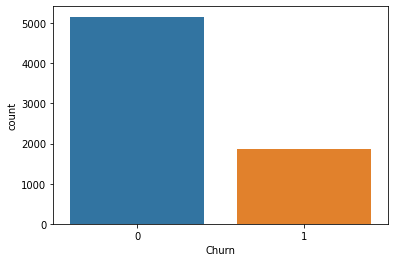

In [ ]:
sns.countplot(x="Churn",data=df)
plt.show()

In [ ]:
from imblearn import under_sampling, over_sampling

X = df.drop(['Churn'],axis=1)
y = df['Churn']

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

#Spliting Data 

Split the data set as train and test with 20:80 ratio.

In [ ]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2,random_state =1)


### Apply Machine Learning Algorithms

Let's start to apply some machine learning algorithms and find the accuracy of each.

#### 1. KNN Classification


We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.

In [ ]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7836398838334947


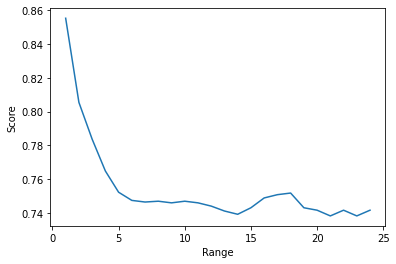

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 1, then we get maximum score of 86%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #set K neighbor as 11
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.8552758954501453


#### 2. SVM(Support Vector Machine) Classification

In [ ]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.723136495643756


#### 3. Logistic Regression Classification

In [ ]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7536302032913843


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 4. Decision Tree Classification

In [ ]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8678606001936109


#### 5. Random Forest Classification

In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.8727008712487899


I set tree number as 5 initially. But I want to find the appropriate tree number.

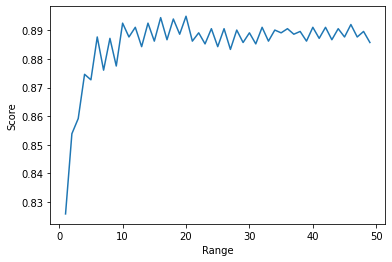

In [ ]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see, the highest accuracy is at n_estimators = 45.

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 33, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.8862536302032914


#### 6.Naive Bayes Classification

In [ ]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7265246853823815


### Evaluation

In [ ]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

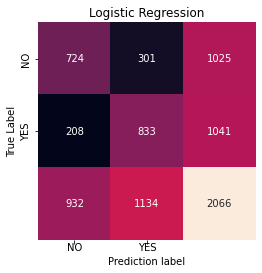

In [ ]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


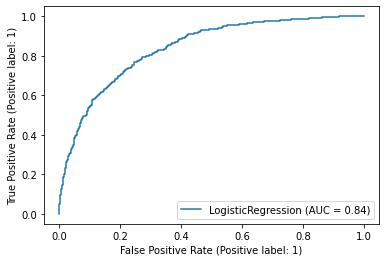

In [ ]:
plot_roc_curve(lr_model,x_test,y_test)
plt.show()

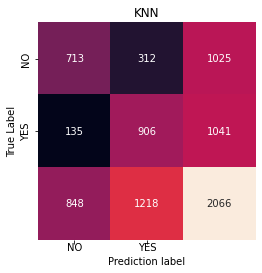

In [ ]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


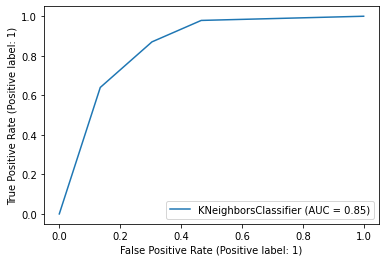

In [ ]:
plot_roc_curve(knn,x_test,y_test)
plt.show()

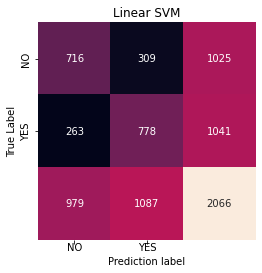

In [ ]:
model_evaluation(svc_model.predict(x_test),"Linear SVM")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


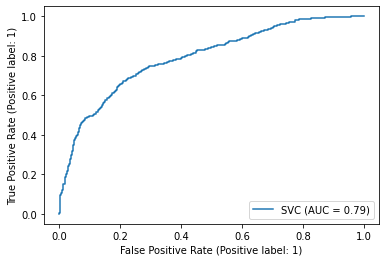

In [ ]:
plot_roc_curve(svc_model,x_test,y_test)
plt.show()

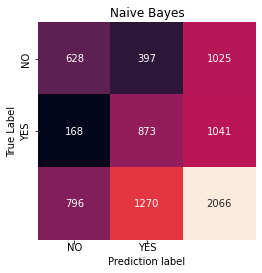

In [ ]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


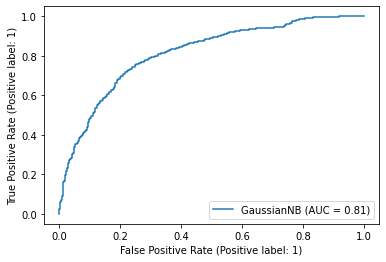

In [ ]:
plot_roc_curve(nb_model,x_test,y_test)
plt.show()

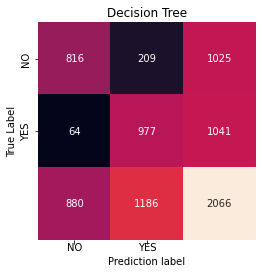

In [ ]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


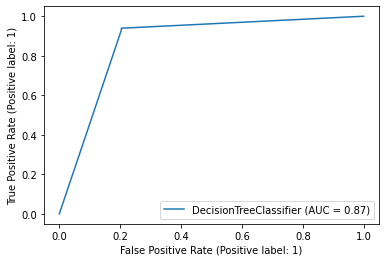

In [ ]:
plot_roc_curve(dt_model,x_test,y_test)
plt.show()

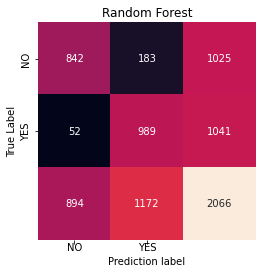

In [ ]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


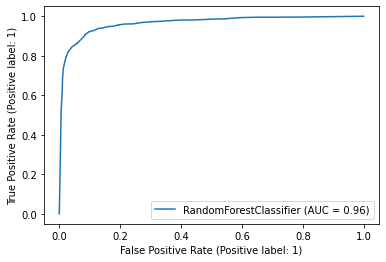

In [ ]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()

In [ ]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [ ]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========SVC=========;",y_test, svc_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.7536302032913843
precision:  0.7345679012345679
recall:  0.8001921229586936
f1_score:  0.7530434617671805
=========SVC=========;
accuracy:  0.723136495643756
precision:  0.7157313707451702
recall:  0.7473583093179635
f1_score:  0.7229513361895384
=========Naive Bayes=========;
accuracy:  0.7265246853823815
precision:  0.6874015748031496
recall:  0.8386167146974063
f1_score:  0.7228787429585033
=========Decision Tree=========;
accuracy:  0.8678606001936109
precision:  0.8237774030354131
recall:  0.9385206532180596
f1_score:  0.8671334719551157
=========Random Forest=========;
accuracy:  0.8862536302032914
precision:  0.8438566552901023
recall:  0.9500480307396734
f1_score:  0.8857378439218917
=========KNN=========;
accuracy:  0.7836398838334947
precision:  0.7438423645320197
recall:  0.8703170028818443
f1_score:  0.7818930412392601


# Conclusion

1. Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
2. Random Forest gives the highest F1 Score, so it is the best model.
3. Naive Bayesis the worst model because it gives the lowest F1 score.
4. People having month-to-month contract tend to churn more than people having long term conracts.
5. As the tenure increases, the probability of churn decreases.
6. As tmonthly charges increases, the probability of churn increases.